In [1]:
import utils
import ImageClassification as ic

c:\Users\lilywhite\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


data=26640, label=26640, trainingset=180, average_size=[4023.9757339338676, 4100.411432515495]


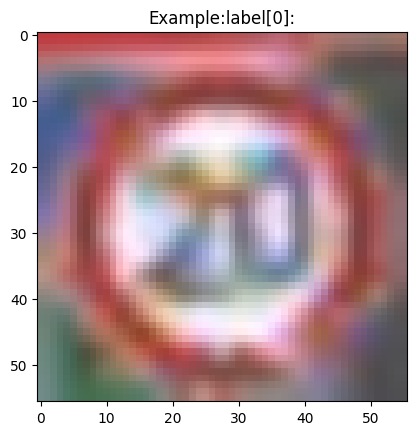

In [2]:
# data, label = utils.loadTrainData(image_size=(28,28), showExample=True)
data, label = utils.loadTrainData_Roi(image_size=(56,56), showExample=True)

In [3]:
X_train, X_test, y_train, y_test = utils.seperateDataset(data, label)

X_train=torch.Size([21312, 3, 56, 56]), X_test=torch.Size([5328, 3, 56, 56])
y_train=torch.Size([21312]), y_test=torch.Size([5328])


In [4]:
from torch import nn,optim
batch_size = 64  # batch大小
epoch_num = 50  # 训练轮次数
val_num = 5     # 训练几轮验证一次

model = ic.Net(image_size=(56,56))
loss_function = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.0001)

loss, acc = ic.train(X_train, y_train, X_test, y_test, model,
                     loss_function, optimizer, batch_size, epoch_num, val_num, output_log=False)

c:\Users\lilywhite\.conda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


[2025-04-06 01:47:20] epoch 5 | loss:0.0131 | acc:0.9664 | time:367.25s
[2025-04-06 01:53:44] epoch 10 | loss:0.1573 | acc:0.9788 | time:379.75s
[2025-04-06 02:00:11] epoch 15 | loss:0.0052 | acc:0.9917 | time:381.91s
[2025-04-06 02:06:41] epoch 20 | loss:0.0017 | acc:0.9889 | time:385.52s
[2025-04-06 02:13:13] epoch 25 | loss:0.0023 | acc:0.9895 | time:386.66s
[2025-04-06 02:19:30] epoch 30 | loss:0.0003 | acc:0.9916 | time:372.98s
[2025-04-06 02:25:33] epoch 35 | loss:0.0009 | acc:0.9917 | time:358.89s
[2025-04-06 02:31:37] epoch 40 | loss:0.0032 | acc:0.9927 | time:359.93s
[2025-04-06 02:37:43] epoch 45 | loss:0.0001 | acc:0.9904 | time:361.76s
[2025-04-06 02:43:49] epoch 50 | loss:0.0000 | acc:0.9921 | time:361.55s
Finished Training! BATCH_SIZE=64, EPOCH=50, VAL_NUM=5


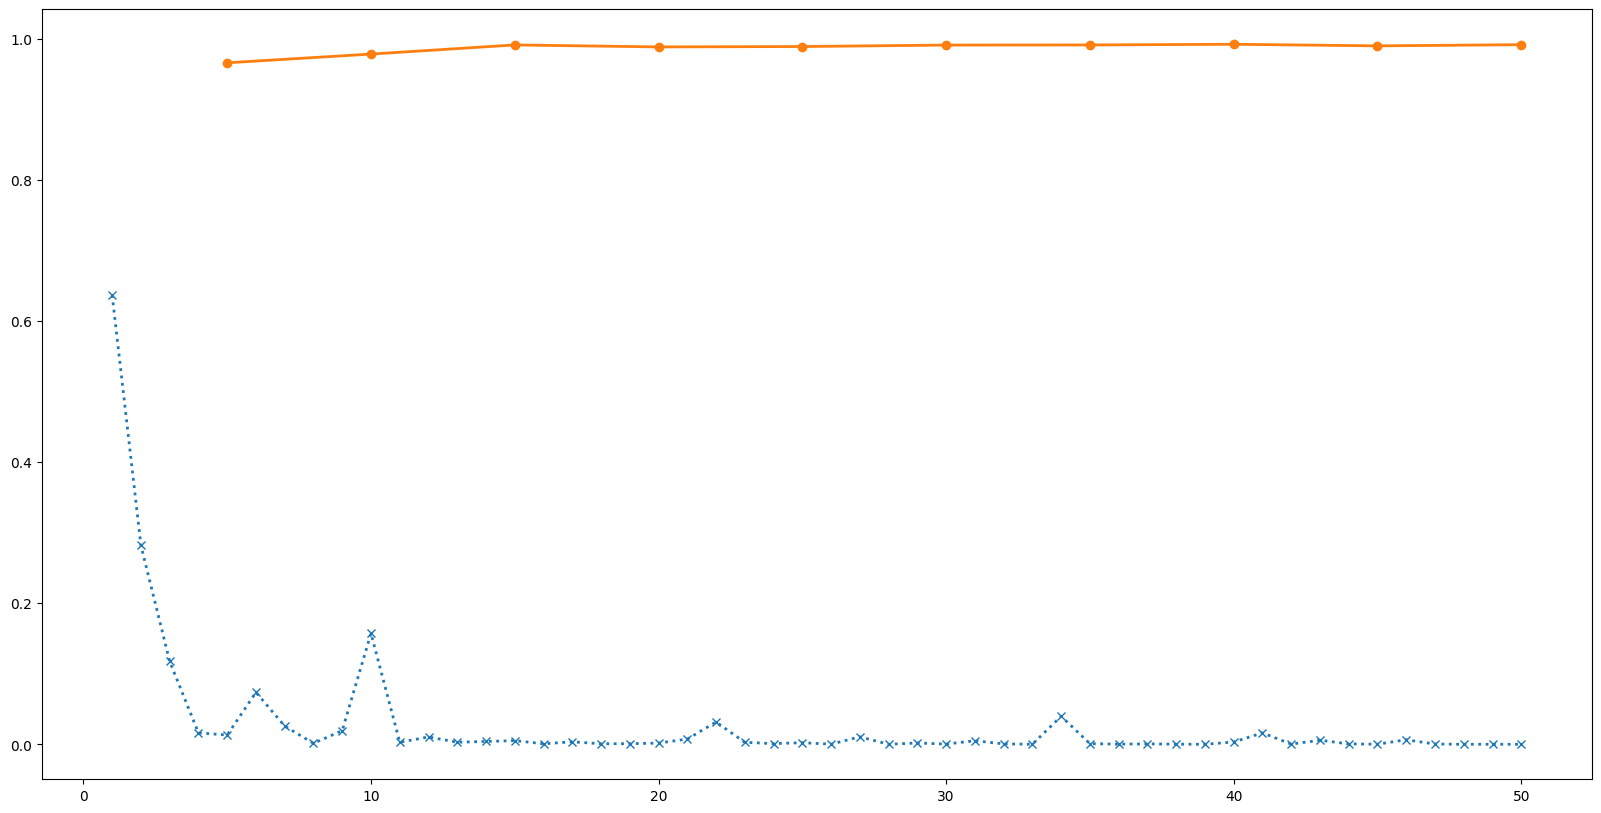

In [5]:
utils.illustrate(loss, acc, saveFig="ModelTraning.png")

test images=12630, average_size=[245441.5, 244868.5]


d:\Python_Code\CNN-GTSRB\utils.py:167: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  test = torch.FloatTensor(test)


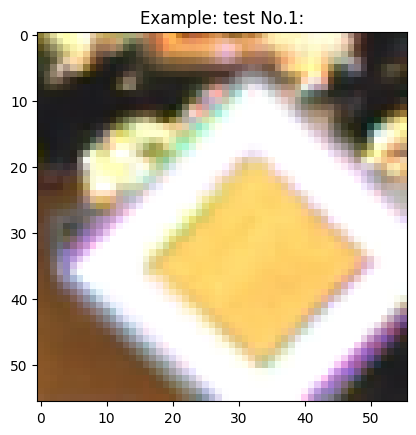

In [6]:
# test = utils.loadTestData(image_size=(28,28), showExample=True)
test = utils.loadTestData_Roi(image_size=(56,56), showExample=True)

In [7]:
utils.predict(model, test, showExample=True)

Finished Predicting! processed images=12630
00000.ppm is labeled as 12
00001.ppm is labeled as 12
00002.ppm is labeled as 13
00003.ppm is labeled as 12
00004.ppm is labeled as 2
00005.ppm is labeled as 38
00006.ppm is labeled as 25
00007.ppm is labeled as 12
00008.ppm is labeled as 13
00009.ppm is labeled as 2
